# **Penerapan Analysis Sentimen Twittter pada Keyword "Elektabilitas Anies" Menggunakan Algoritma Naive Bayes dan SVM**

# **Perbandingan Data Latih dan Data Uji 70:30**

# Data Diri Mahasiswa
### Nama :  Lutfi Fajri Akbar
### NPM : 201910225014
### Angkatan : 2019

# Deskripsi Program

## Tujuan

Untuk menganalisis sentimen masyarakat berdasarkan ulasan-ulasan yang diberikannya pada media sosial Twitter mengenai elektabilitas Anies Baswedan sebagai bacapres di Pemilu 2024 dengan klasifikasi 2 kelas/binary classification(positive dan negative).

## Dataset Yang Digunakan

*   Dataset dikumpulkan menggunakan teknik scraping otomatis (Node.js) dan scraping manual (Copy & Paste) dari media sosial Twitter.
*   Data dilabelkan secara manual dengan validasi dari anator pakar bahasa, lalu dimasukkan ke dalam format file dataset .CSV
*   Dataset milik Lutfi Fajri Akbar.
*   Link URL Dataset: https://drive.google.com/drive/folders/1jsEd_yo5bXrjIAu7_JePb-cSy1fN1VZ9?usp=sharing


# Data Understanding

## Import Dataset: Dataset Di-Upload di Google Drive

In [ ]:
from google.colab import drive

# Hubungkan Google Colab dengan Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Membaca Dataset dengan Library Pandas

In [ ]:
import pandas as pd

# Dataset dikonversi menjadi Pandas Dataframe
df = pd.read_csv('/content/drive/MyDrive/Dataset Skripsi Lutfi/Dataset Sentimen Tweets Elektabilitas Anies.csv')

## Data Exploration

In [ ]:
# Mengetahui Informasi Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2809 non-null   object
 1   sentiment  2809 non-null   object
dtypes: object(2)
memory usage: 44.0+ KB


In [ ]:
# Cek keberadaan missing value
missing_values = df.isnull().sum()
print("Jumlah missing value pada setiap kolom:")
print(missing_values)

# Cek lokasi missing value
missing_rows = df[df.isnull().any(axis=1)]
print("\nBaris dengan missing value:")
print(missing_rows)

Jumlah missing value pada setiap kolom:
review       0
sentiment    0
dtype: int64

Baris dengan missing value:
Empty DataFrame
Columns: [review, sentiment]
Index: []


In [ ]:
df.head(20)

,review,sentiment
0,Pollmark Research Center mengeluarkan hasil su...,positive
1,Partai NasDem mendapatkan peningkatan yang san...,positive
2,Bahagia lah sekarang ...nanti ujung2 Anies da...,positive
3,Elektabilitas Anies Tertinggi di Jakarta #AHYP...,positive
4,Anies gak separah itu lah damage nya. Elektabi...,negative
5,Petinggi Golkar Sesumbar Elektabilitas Airlang...,negative
6,Peluang Anies jadi presiden sangat besar,positive
7,Pollmark Research Center mengeluarkan hasil su...,positive
8,Elektabilitas Anies dan AHY seimbang. AHY pali...,positive
9,tidak ada harapan bagi Anies untuk menjadi Pre...,negative


In [ ]:
# Menghitung jumlah data pada setiap label
label_counts = df['sentiment'].value_counts()

# Menampilkan nama label dan jumlah data dalam angka
print("Label dan jumlah data pada kolom 'sentiment':")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Label dan jumlah data pada kolom 'sentiment':
negative: 1567
positive: 1242


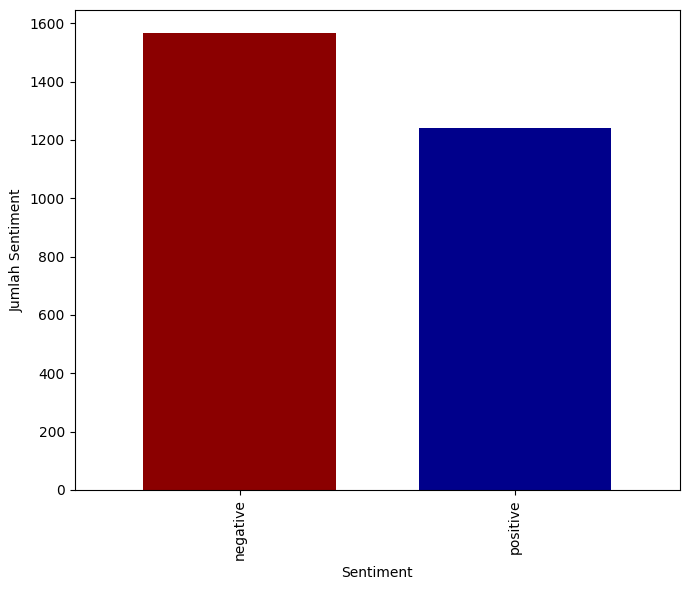

In [ ]:
# Menampilkan nama label dan jumlah data dalam plot
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(7,6))
stars_histogram = df['sentiment'].value_counts().sort_index()

# Mendefinisikan warna untuk setiap label
colors = ['darkred', 'darkblue']

# Membuat diagram batang dengan warna yang sesuai untuk setiap label
stars_histogram.plot(kind='bar', width=0.7, color=colors)

plt.xlabel('Sentiment')
plt.ylabel('Jumlah Sentiment')

plt.tight_layout()
plt.show()

# Data Preparation

### Label Encoder

In [ ]:
df['target'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
df = df.drop(columns = 'sentiment')

df.head(20)

,review,target
0,Pollmark Research Center mengeluarkan hasil su...,1
1,Partai NasDem mendapatkan peningkatan yang san...,1
2,Bahagia lah sekarang ...nanti ujung2 Anies da...,1
3,Elektabilitas Anies Tertinggi di Jakarta #AHYP...,1
4,Anies gak separah itu lah damage nya. Elektabi...,0
5,Petinggi Golkar Sesumbar Elektabilitas Airlang...,0
6,Peluang Anies jadi presiden sangat besar,1
7,Pollmark Research Center mengeluarkan hasil su...,1
8,Elektabilitas Anies dan AHY seimbang. AHY pali...,1
9,tidak ada harapan bagi Anies untuk menjadi Pre...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  2809 non-null   object
 1   target  2809 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.0+ KB


### Case Folding

In [ ]:
import pandas as pd

def case_folding(tweet):
    return tweet.lower()

# Menerapkan case folding pada kolom "review" dalam dataframe "df"
df['review'] = df['review'].apply(case_folding)

df.head(20)

,review,target
0,pollmark research center mengeluarkan hasil su...,1
1,partai nasdem mendapatkan peningkatan yang san...,1
2,bahagia lah sekarang ...nanti ujung2 anies da...,1
3,elektabilitas anies tertinggi di jakarta #ahyp...,1
4,anies gak separah itu lah damage nya. elektabi...,0
5,petinggi golkar sesumbar elektabilitas airlang...,0
6,peluang anies jadi presiden sangat besar,1
7,pollmark research center mengeluarkan hasil su...,1
8,elektabilitas anies dan ahy seimbang. ahy pali...,1
9,tidak ada harapan bagi anies untuk menjadi pre...,0


### Cleansing

In [ ]:
import re
import pandas as pd

def cleaning(tweet):
    # Menghapus URL
    tweet = re.sub(r'http\S+', '', tweet)

    # Menghapus username
    tweet = re.sub(r'@\w+', '', tweet)

    # Menghapus hashtag
    tweet = re.sub(r'#\w+', '', tweet)

    # Menghapus tanda baca dan angka
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet)

    # Menghapus spasi yang berlebihan
    tweet = re.sub(r'\s+', ' ', tweet)

    return tweet

# Menerapkan fungsi "cleaning" pada kolom "review" dalam dataframe "df"
df['review'] = df['review'].apply(cleaning)

df.head(20)

,review,target
0,pollmark research center mengeluarkan hasil su...,1
1,partai nasdem mendapatkan peningkatan yang san...,1
2,bahagia lah sekarang nanti ujung anies dan pra...,1
3,elektabilitas anies tertinggi di jakarta,1
4,anies gak separah itu lah damage nya elektabil...,0
5,petinggi golkar sesumbar elektabilitas airlang...,0
6,peluang anies jadi presiden sangat besar,1
7,pollmark research center mengeluarkan hasil su...,1
8,elektabilitas anies dan ahy seimbang ahy palin...,1
9,tidak ada harapan bagi anies untuk menjadi pre...,0


### Tokenization

In [ ]:
import re
import pandas as pd

def tokenization(tweet):
    # Melakukan tokenisasi
    tokens = re.split(r'\s+', tweet)
    return tokens

# Menerapkan fungsi "tokenization" pada kolom "review" dalam dataframe "df"
df['review'] = df['review'].apply(tokenization)

df.head(20)

,review,target
0,"[pollmark, research, center, mengeluarkan, has...",1
1,"[partai, nasdem, mendapatkan, peningkatan, yan...",1
2,"[bahagia, lah, sekarang, nanti, ujung, anies, ...",1
3,"[elektabilitas, anies, tertinggi, di, jakarta, ]",1
4,"[anies, gak, separah, itu, lah, damage, nya, e...",0
5,"[petinggi, golkar, sesumbar, elektabilitas, ai...",0
6,"[peluang, anies, jadi, presiden, sangat, besar]",1
7,"[pollmark, research, center, mengeluarkan, has...",1
8,"[elektabilitas, anies, dan, ahy, seimbang, ahy...",1
9,"[tidak, ada, harapan, bagi, anies, untuk, menj...",0


### Normalisasi

In [ ]:
def normalization(tokens):
    slang_words = {
        "ahy": "agus harimurti yudhoyono",
        "jkw": "jokowi",
        "rk": "ridwan kamil",
        "ps": "prabowo subianto",
        "gp": "ganjar pranowo",
        "ab": "anies baswedan",
        "lg": "lagi",
        "pake": "pakai",
        "org": "orang",
        "wong": "orang",
        "adl": "adalah",
        "mmg": "memang",
        "emang":"memang",
        "ky": "seperti",
        "kayak": "seperti",
        "spt": "seperti",
        "spy": "supaya",
        "ketum": "ketua umum",
        "menhan": "menteri pertahanan",
        "gub": "gubernur",
        "wagub": "wakil gubernur",
        "capres": "calon presiden",
        "bacapres": "bakal calon presiden",
        "cawapres": "calon wakil presiden",
        "klo": "kalau",
        "kalo": "kalau",
        "klu": "kalau",
        "kl": "kalau",
        "bnyk": "banyak",
        "byk": "banyak",
        "knp": "kenapa",
        "mngp": "mengapa",
        "mngapa": "mengapa",
        "bbrp": "beberapa",
        "bakal": "akan",
        "bakalan": "akan",
        "bnr": "benar",
        "bener": "benar",
        "skrg": "sekarang",
        "skrng": "sekarang",
        "msh": "masih",
        "bhw": "bahwa",
        "gimana": "bagaimana",
        "gmn": "bagaimana",
        "dmn": "dimana",
        "dlm": "dalam",
        "duid": "uang",
        "duit": "uang",
        "nyari": "cari",
        "naek": "naik",
        "mau": "ingin",
        "sdh": "sudah",
        "udh": "sudah",
        "udah": "sudah",
        "jkt": "jakarta",
        "jateng": "jawa tengah",
        "jatim": "jawa timur",
        "jabar": "jawa barat",
        "jdi": "jadi",
        "jd": "jadi",
        "sbg": "sebagai",
        "sbgi": "sebagai",
        "scr": "secara",
        "sampe": "sampai",
        "jg": "juga",
        "trs": "terus",
        "trus": "terus",
        "ttp": "tetap",
        "tp": "tetapi",
        "tpi": "tetapi",
        "tapi": "tetapi",
        "dkk": "dan kawan kawan",
        "dll": "dan lain lain",
        "dsb": "dan sebagainya",
        "dst": "dan seterusnya",
        "krn": "karena",
        "krna": "karena",
        "yg": "yang",
        "sj": "saja",
        "aja": "saja",
        "pdhl": "padahal",
        "pd": "pada",
        "kpd": "kepada",
        "pa": "bapak",
        "pak": "bapak",
        "bpk": "bapak",
        "tau": "tahu",
        "thn": "tahun",
        "mrk": "mereka",
        "sy": "saya",
        "ane": "saya",
        "aku": "saya",
        "gua": "saya",
        "gue": "saya",
        "gw": "saya",
        "utk": "untuk",
        "lu": "kamu",
        "lo": "kamu",
        "loe": "kamu",
        "ente": "kamu",
        "kau": "kamu",
        "elu": "kamu",
        "anda": "kamu",
        "ia": "dia",
        "bgt": "banget",
        "iy": "iya",
        "bkn": "bukan",
        "blm": "belum",
        "tak": "tidak",
        "enggak": "tidak",
        "nggak": "tidak",
        "ngga": "tidak",
        "gak": "tidak",
        "ga": "tidak",
        "tdk": "tidak",
        "gk": "tidak",
        "jgn": "jangan",
        "ama": "sama",
        "dg": "dengan",
        "dgn": "dengan",
        "dr": "dari",
        "drpd": "daripada",
        "dri": "dari",
        "bs": "dapat",
        "bisa": "dapat",
        "dpt": "dapat",
        "cuma": "hanya",
        "cuman": "hanya",
        "cm": "hanya",
        "blh": "boleh",
        "shg": "sehingga",
        "tsb": "tersebut",
        "thd": "terhadap",
        "liat": "lihat",
        "pemilu": "pilpres",
        "survey": "survei",
        "lbh": "lebih"
        # daftar lengkap kata slang lainnya
    }
    normalized_tokens = []
    for token in tokens:
        if token in slang_words:
            normalized_tokens.append(slang_words[token])
        else:
            normalized_tokens.append(token)
    return normalized_tokens

# Menerapkan fungsi "normalization" pada kolom "review" dalam dataframe "df"
df['review'] = df['review'].apply(normalization)

df.head(20)

,review,target
0,"[pollmark, research, center, mengeluarkan, has...",1
1,"[partai, nasdem, mendapatkan, peningkatan, yan...",1
2,"[bahagia, lah, sekarang, nanti, ujung, anies, ...",1
3,"[elektabilitas, anies, tertinggi, di, jakarta, ]",1
4,"[anies, tidak, separah, itu, lah, damage, nya,...",0
5,"[petinggi, golkar, sesumbar, elektabilitas, ai...",0
6,"[peluang, anies, jadi, presiden, sangat, besar]",1
7,"[pollmark, research, center, mengeluarkan, has...",1
8,"[elektabilitas, anies, dan, agus harimurti yud...",1
9,"[tidak, ada, harapan, bagi, anies, untuk, menj...",0


### Remove Stopwords

In [ ]:
# Install Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def remove_stopwords(tokens):
    # Menghapus Stopwords
    stopword_factory = StopWordRemoverFactory()
    stopwords = stopword_factory.get_stop_words()

    # Menghapus kata 'tidak' dari daftar stopwords
    stopwords.remove('tidak')

    filtered_tokens = [token for token in tokens if token not in stopwords]
    return filtered_tokens
    #return ' '.join(filtered_tokens)

# Menerapkan fungsi "remove_stopwords" pada kolom "review" dalam dataframe "df"
df['review'] = df['review'].apply(remove_stopwords)

df.head(20)

,review,target
0,pollmark research center mengeluarkan hasil su...,1
1,partai nasdem mendapatkan peningkatan sangat t...,1
2,bahagia lah sekarang ujung anies prabowo unggul,1
3,elektabilitas anies tertinggi jakarta,1
4,anies tidak separah lah damage nya elektabilit...,0
5,petinggi golkar sesumbar elektabilitas airlang...,0
6,peluang anies jadi presiden sangat besar,1
7,pollmark research center mengeluarkan hasil su...,1
8,elektabilitas anies agus harimurti yudhoyono s...,1
9,tidak harapan anies menjadi presiden,0


### Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(tokens):
    #Melakukan Stemming
    stemmer_factory = StemmerFactory()
    stemmer = stemmer_factory.create_stemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Menerapkan fungsi "stemming" pada kolom "review" dalam dataframe "df"
df['review'] = df['review'].apply(stemming)

df.head(20)

# Export & Import Dataset Clean: Dataset Di-Upload di Google Colab

In [ ]:
import pandas as pd

# Menyimpan DataFrame ke dalam file CSV
df.to_csv('Dataset Sentimen Tweets Elektabilitas Anies [CLEAN].csv', index=False)

In [ ]:
import pandas as pd

# Dataset dikonversi menjadi Pandas Dataframe
df = pd.read_csv('/content/Dataset Sentimen Tweets Elektabilitas Anies [CLEAN].csv')

# FULL Data Preparation

In [ ]:
'''import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membersihkan dari username
def remove_username(text):
    text = re.sub(r'@\w+', '', text)
    return text

# Membersihkan dari hashtag
def remove_hashtag(text):
    text = re.sub(r'#\w+', '', text)
    return text

# membersihkan url
def clean_url(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    return text

# Melakukan normalization pada kata gaul dalam bahasa Indonesia
def normalize(text):
    slang = {
        "ahy": "agus harimurti yudhoyono",
        "nol": "kosong",
        "jd": "jadi",
        "jg": "juga",
        "yg": "yang",
        "ke": "menuju",
        "aja": "saja",
        "pd": "pada",
        "kpd": "kepada",
        "pa": "bapak",
        "pak": "bapak",
        "bp": "bapak",
        "tau": "tahu",
        "ane": "saya",
        "aku": "saya",
        "gua": "saya",
        "gw": "saya",
        "utk": "untuk",
        "lu": "kamu",
        "loe": "kamu",
        "ente": "kamu",
        "bgt": "banget",
        "iy": "iya",
        "tak": "tidak",
        "ga": "tidak",
        "tdk": "tidak",
        "jgn": "jangan",
        "dg": "dengan",
        "dgn": "dengan",
        "ri": "indonesia",
        "bs": "dapat",
        "blh": "boleh",
        "lbh": "lebih"
    }
    words = text.split()
    normalized_words = []
    for word in words:
        if word in slang:
            normalized_words.append(slang[word])
        else:
            normalized_words.append(word)
    text = ' '.join(normalized_words)
    return text

# Menghilangkan kata yang hanya terdiri dari 1-3 karakter
def remove_shortwords(text):
    text = re.sub(r'\b\w{1,3}\b', '', text)
    return text

# membersihkan tanda baca, dan angka
def clean_punctuation_number(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text

# case folding
def case_folding(text):
    return text.lower()

# Fungsi untuk menghapus seluruh emoticon
def remove_emoticon(text):
    emoticons = re.compile('[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', flags=re.UNICODE)
    return emoticons.sub(r'', text)

# proses menghilangkan stopword
def remove_stopword(text):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    return stopword.remove(text)

# proses stemming
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

# proses preprocessing
def preprocessing(text):
    text = remove_username(text)
    text = remove_hashtag(text)
    text = clean_url(text)
    text = normalize(text)
    text = remove_shortwords(text)
    text = clean_punctuation_number(text)
    text = case_folding(text)
    text = remove_emoticon(text)
    text = remove_stopword(text)
    text = stemming(text)
    return text'''

In [ ]:
'''df['review']=df['review'].apply(lambda x:preprocessing(x))'''

# ANOTHER FULL Data Preparation

In [ ]:
'''import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Fungsi untuk melakukan preprocessing
def preprocess_tweet(tweet):

    # Case folding
    tweet = tweet.lower()

    # Cleaning
    tweet = re.sub(r'http\S+', '', tweet) # menghapus URL
    tweet = re.sub(r'@\w+', '', tweet) # menghapus username
    tweet = re.sub(r'#\w+', '', tweet) # menghapus hastag
    tweet = re.sub(r'\n', ' ', tweet) # menghapus baris baru
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet) # menghapus tanda baca dan angka
    tweet = re.sub(r'\s+', ' ', tweet) # menghapus spasi yang berlebihan

    # Tokenization
    tokens = re.split(r'\s+', tweet)

    # Normalisasi kata slang Bahasa Indonesia
    slang_words = {
        "ahy": "agus harimurti yudhoyono",
        "jkw": "jokowi",
        "rk": "ridwan kamil",
        "ps": "prabowo subianto",
        "gp": "ganjar pranowo",
        "ab": "anies baswedan",
        "lg": "lagi",
        "pake": "pakai",
        "org": "orang",
        "wong": "orang",
        "adl": "adalah",
        "mmg": "memang",
        "ky": "seperti",
        "kayak": "seperti",
        "spt": "seperti",
        "spy": "supaya",
        "ketum": "ketua umum",
        "menhan": "menteri pertahanan",
        "gub": "gubernur",
        "wagub": "wakil gubernur",
        "capres": "calon presiden",
        "bacapres": "bakal calon presiden",
        "cawapres": "calon wakil presiden",
        "klo": "kalau",
        "kalo": "kalau",
        "klu": "kalau",
        "kl": "kalau",
        "bnyk": "banyak",
        "byk": "banyak",
        "knp": "kenapa",
        "mngp": "mengapa",
        "mngapa": "mengapa",
        "bbrp": "beberapa",
        "bnr": "benar",
        "bener": "benar",
        "skrg": "sekarang",
        "skrng": "sekarang",
        "msh": "masih",
        "bhw": "bahwa",
        "gimana": "bagaimana",
        "gmn": "bagaimana",
        "dmn": "dimana",
        "dlm": "dalam",
        "duid": "uang",
        "duit": "uang",
        "nyari": "cari",
        "naek": "naik",
        "mau": "ingin",
        "sdh": "sudah",
        "udh": "sudah",
        "udah": "sudah",
        "jkt": "jakarta",
        "jateng": "jawa tengah",
        "jatim": "jawa timur",
        "jabar": "jawa barat",
        "jdi": "jadi",
        "jd": "jadi",
        "sbg": "sebagai",
        "sbgi": "sebagai",
        "scr": "secara",
        "sampe": "sampai",
        "jg": "juga",
        "trs": "terus",
        "trus": "terus",
        "ttp": "tetap",
        "tp": "tetapi",
        "tpi": "tetapi",
        "tapi": "tetapi",
        "dkk": "dan kawan kawan",
        "dll": "dan lain lain",
        "dsb": "dan sebagainya",
        "dst": "dan seterusnya",
        "krn": "karena",
        "krna": "karena",
        "yg": "yang",
        "sj": "saja",
        "aja": "saja",
        "pdhl": "padahal",
        "pd": "pada",
        "kpd": "kepada",
        "pa": "bapak",
        "pak": "bapak",
        "bpk": "bapak",
        "tau": "tahu",
        "mrk": "mereka",
        "sy": "saya",
        "ane": "saya",
        "aku": "saya",
        "gua": "saya",
        "gue": "saya",
        "gw": "saya",
        "utk": "untuk",
        "lu": "kamu",
        "lo": "kamu",
        "loe": "kamu",
        "ente": "kamu",
        "elu": "kamu",
        "bgt": "banget",
        "iy": "iya",
        "bkn": "bukan",
        "blm": "belum",
        "tak": "tidak",
        "enggak": "tidak",
        "nggak": "tidak",
        "ngga": "tidak",
        "gak": "tidak",
        "ga": "tidak",
        "tdk": "tidak",
        "gk": "tidak",
        "jgn": "jangan",
        "ama": "sama",
        "dg": "dengan",
        "dgn": "dengan",
        "dr": "dari",
        "drpd": "daripada",
        "dri": "dari",
        "bs": "dapat",
        "bisa": "dapat",
        "dpt": "dapat",
        "cuma": "hanya",
        "cuman": "hanya",
        "cm": "hanya",
        "blh": "boleh",
        "shg": "sehingga",
        "trus": "terus",
        "tsb": "tersebut",
        "thd": "terhadap",
        "liat": "lihat",
        "lbh": "lebih"
    }
    normalized_tokens = []
    for token in tokens:
        if token in slang_words:
            normalized_tokens.append(slang_words[token])
        else:
            normalized_tokens.append(token)

    # Remove Stopwords
    stopword_factory = StopWordRemoverFactory()
    stopwords = stopword_factory.get_stop_words()

    filtered_tokens = [token for token in normalized_tokens if token not in stopwords]

    # Stemming
    stemmer_factory = StemmerFactory()
    stemmer = stemmer_factory.create_stemmer()

    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    # Mengembalikan tweet yang telah dipreprocessing
    return ' '.join(stemmed_tokens)'''

In [ ]:
'''df['review']=df['review'].apply(lambda x:preprocess_tweet(x))
df.head(20)'''

### Merubah Dataset Menjadi Array

In [ ]:
#mengubah kolom 'review' dan 'target' dari DataFrame df menjadi numpy array
review = df['review'].values
label = df['target'].values

In [ ]:
review

array(['pollmark research center keluar hasil survei calon presiden pilpres hasil elektabilitas ganjar atas susul prabowo anies ',
       'partai nasdem dapat tingkat sangat tajam survei elektabilitas berkat efek deklarasi bapak anies baswedan calon presiden ',
       'bahagia lah sekarang ujung anies prabowo unggul', ...,
       'tekan luar biasa alami anies baswedan tidak bendung elektabilitasnya elektabilitas anies terus alami naik signifikan bayang kalau lapang main netral fair tunjuk daya tahan anies dukung luar biasa ',
       'bikin males dukung anies dukung bego ',
       'kasihan bapak anies wkwkwk lagipula ngapain dukung ntar kalau pilih se indonesia kena prank sama kerja kerja wkwk'],
      dtype=object)

In [ ]:
label

array([1, 1, 1, ..., 1, 0, 0])

## Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(review, label, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(review, label, test_size=0.3)

In [ ]:
len(x_train)

1966

In [ ]:
len(x_test)

843

### Persentase Pembagian Data Uji

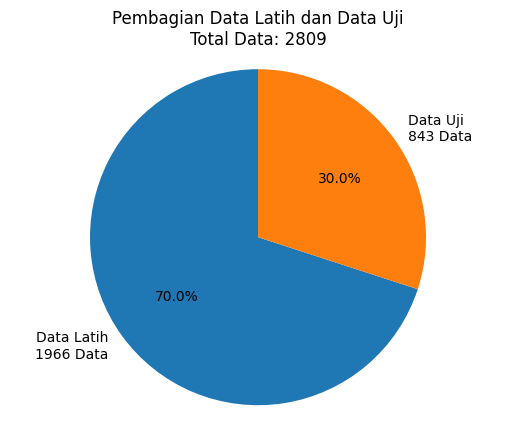

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah data latih dan data uji
total_data = len(review)
total_data_latih = len(x_train)
total_data_uji = len(x_test)

# Menghitung persentase pembagian
persentase_data_latih = (total_data_latih / total_data) * 100
persentase_data_uji = (total_data_uji / total_data) * 100

# Membuat label dan data untuk Pie Chart
labels = ['Data Latih\n' + str(total_data_latih) + ' Data',
          'Data Uji\n' + str(total_data_uji) + ' Data']
sizes = [persentase_data_latih, persentase_data_uji]

# Membuat Pie Chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Mengatur aspek persegi pada Pie Chart
plt.axis('equal')

# Menampilkan judul
plt.title('Pembagian Data Latih dan Data Uji\nTotal Data: ' + str(total_data))

# Menampilkan Pie Chart
plt.show()

### Export & Import Dataset Hasil Splitting Dataset: Dataset Di-Upload di Google Colab

In [ ]:
import numpy as np
from scipy.sparse import save_npz

# Simpan keempat data dalam format .npz
np.savez('sentiment_data_70_30.npz', x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

In [ ]:
import numpy as np

# Membaca file .npz
data = np.load('sentiment_data_70_30.npz', allow_pickle=True)

# Mengambil data dari file .npz
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

In [ ]:
# Contoh penggunaan data yang dimuat kembali
print("Shape x_train:", x_train.shape)
print("Shape x_test:", x_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape x_train: (1966,)
Shape x_test: (843,)
Shape y_train: (1966,)
Shape y_test: (843,)


## Vectorizing

### TF-IDF Vectorizing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

In [ ]:
# Mengubah data latih menjadi vektor TF-IDF
x_train_transformed = vectorizer.fit_transform(x_train)

# Mengubah data uji menjadi vektor TF-IDF
x_test_transformed = vectorizer.transform(x_test)

# Modelling Classification: Naive Bayes

## Define & Train Model Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Membuat Model Multinomial Naive Bayes
mnb_model = MultinomialNB()

In [ ]:
# Melatih Model
mnb_model = mnb_model.fit(x_train_transformed, y_train)

In [ ]:
# Membuat objek prediksi pada Data Testing
y_predmnb = mnb_model.predict(x_test_transformed)

# Evaluate Model Naive Bayes

## Evaluate Model Naive Bayes: Confusion Matrix

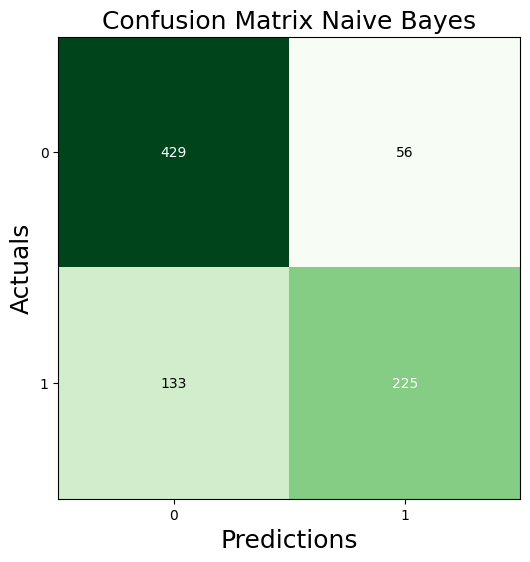

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Menampilkan Confusion Matrix Model Multinomial Naive Bayes
conf_matrixmnb = confusion_matrix(y_test, y_predmnb)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrixmnb, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Naive Bayes', fontsize=18)
plt.show()

## Evaluate Model Naive Bayes: Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

# Menghitung skor akurasi
accuracy_mnb = accuracy_score(y_test, y_predmnb)
rounded_accuracy_mnb = round(accuracy_mnb, 2)
print("Accuracy Score Naive Bayes:", rounded_accuracy_mnb)

Accuracy Score Naive Bayes: 0.78


## Evaluate Model Naive Bayes: Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predmnb, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       485
           1       0.80      0.63      0.70       358

    accuracy                           0.78       843
   macro avg       0.78      0.76      0.76       843
weighted avg       0.78      0.78      0.77       843



## Visualisasi Klasifikasi Data Naive Bayes

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan hasil prediksi dengan teks asli
results = pd.DataFrame({'tekswordlouc_mnb': x_test, 'labelwordloud_mnb': y_predmnb})

# Memisahkan hasil prediksi berdasarkan label
positive_text_mnb = ' '.join(results[results['labelwordloud_mnb'] == 1]['tekswordlouc_mnb'])
negative_text_mnb = ' '.join(results[results['labelwordloud_mnb'] == 0]['tekswordlouc_mnb'])

# Fungsi untuk membuat wordcloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)  # Menambahkan judul pada plot
    plt.show()

### Visualisasi Klasifikasi Data Naive Bayes: Positive

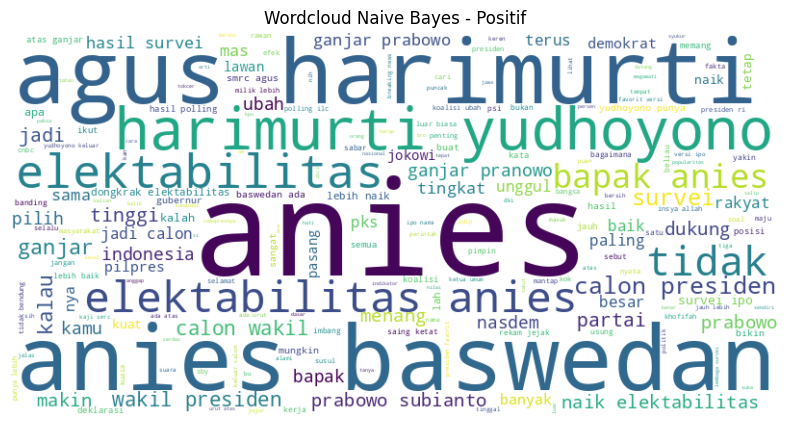

In [ ]:
# Membuat wordcloud untuk hasil prediksi positive
create_wordcloud(positive_text_mnb, "Wordcloud Naive Bayes - Positif")

### Visualisasi Klasifikasi Data Naive Bayes: Negative

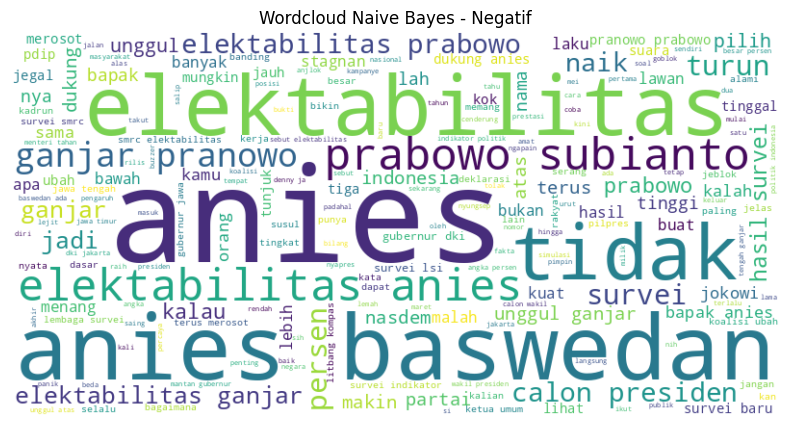

In [ ]:
# Membuat wordcloud untuk hasil prediksi negative?
create_wordcloud(negative_text_mnb, "Wordcloud Naive Bayes - Negatif")

# Modelling Classification: SVM

## Define & Train Model SVM

In [ ]:
from sklearn.svm import SVC

# Membuat model SVM
svc_model = SVC(kernel='linear')

In [ ]:
# Melatih Model
svc_model = svc_model.fit(x_train_transformed, y_train)

In [ ]:
# Membuat objek prediksi pada Data Testing
y_predsvc = svc_model.predict(x_test_transformed)

# Evaluate Model SVM

## Evaluate Model SVM: Confusion Matrix

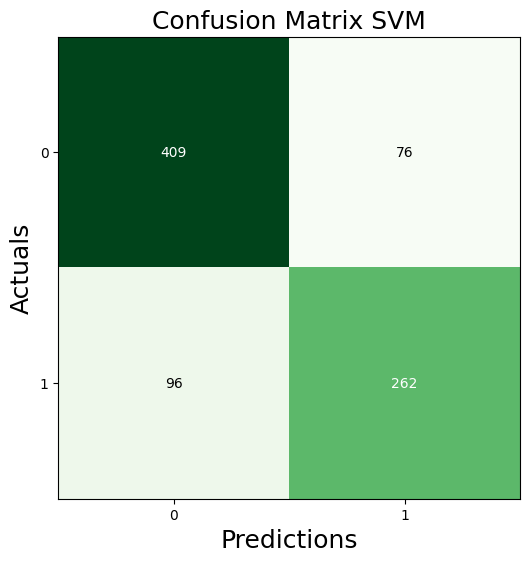

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Menampilkan Confusion Matrix Model Multinomial Naive Bayes
conf_matrixsvc = confusion_matrix(y_test, y_predsvc)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrixsvc, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix SVM', fontsize=18)
plt.show()

## Evaluate Model SVM: Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

# Menghitung skor akurasi
accuracy_svc = accuracy_score(y_test, y_predsvc)
rounded_accuracy_svc = round(accuracy_svc, 2)
print("Accuracy Score SVM:", rounded_accuracy_svc)

Accuracy Score SVM: 0.8


## Evaluate Model SVM: Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predsvc, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       485
           1       0.78      0.73      0.75       358

    accuracy                           0.80       843
   macro avg       0.79      0.79      0.79       843
weighted avg       0.80      0.80      0.80       843



## Visualisasi Klasifikasi Data SVM

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan hasil prediksi dengan teks asli
results = pd.DataFrame({'tekswordlouc_svc': x_test, 'labelwordloud_svc': y_predsvc})

# Memisahkan hasil prediksi berdasarkan label
positive_text_svc = ' '.join(results[results['labelwordloud_svc'] == 1]['tekswordlouc_svc'])
negative_text_svc = ' '.join(results[results['labelwordloud_svc'] == 0]['tekswordlouc_svc'])

# Fungsi untuk membuat wordcloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)  # Menambahkan judul pada plot
    plt.show()

### Visualisasi Klasifikasi Data SVM: Positive

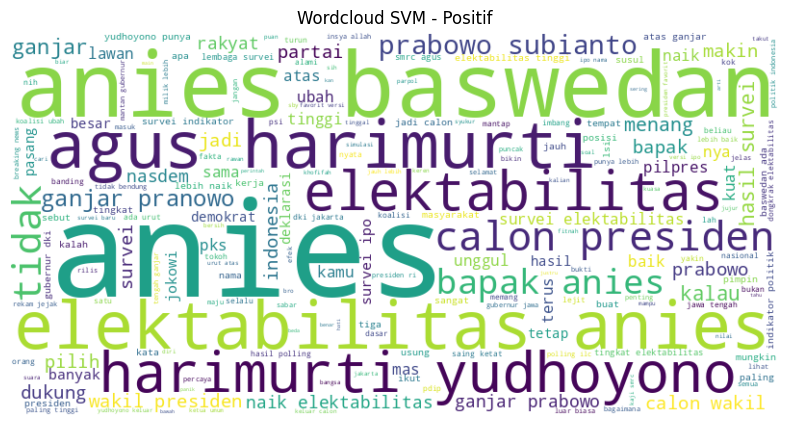

In [ ]:
# Membuat wordcloud untuk hasil prediksi positive
create_wordcloud(positive_text_svc, "Wordcloud SVM - Positif")

### Visualisasi Klasifikasi Data SVM: Negative

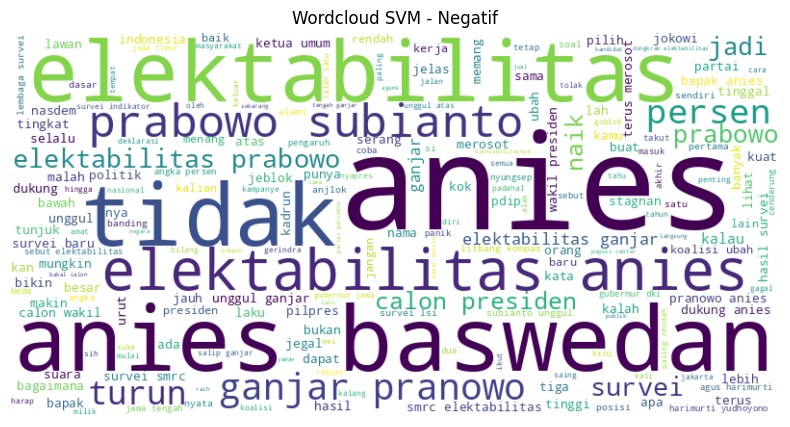

In [ ]:
# Membuat wordcloud untuk hasil prediksi negative
create_wordcloud(negative_text_svc, "Wordcloud SVM - Negatif")